In [64]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [66]:
data=pd.read_csv('C:/Users/Lokesh/Desktop/ML - 1ST PROJECT/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [68]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [70]:
data.drop('CustomerID',axis=1,inplace=True)

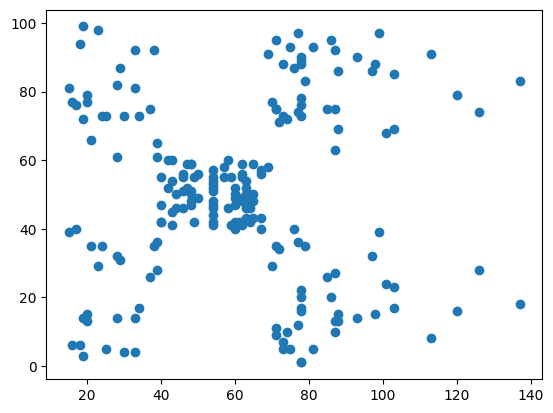

In [73]:
plt.scatter(data['Annual Income (k$)'],data['Spending Score (1-100)']) 
plt.show()

In [75]:
final= data.iloc[:, [2,3]].values
final

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [77]:
ilist=[]
n=11
for i in range(1,n):
    km=KMeans(n_clusters=i)
    km.fit_predict(final)
    ilist.append(km.inertia_)

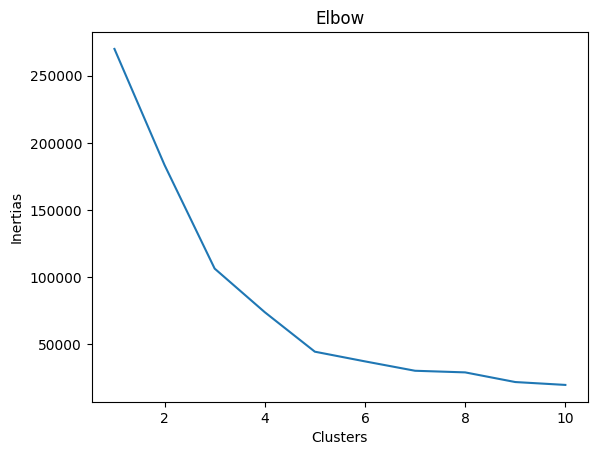

In [79]:
plt.plot(range(1,n),ilist)
plt.title("Elbow")
plt.xlabel("Clusters")
plt.ylabel('Inertias')
plt.show()

In [81]:
km=KMeans(n_clusters=5)
y_pred=km.fit_predict(final)
y_pred

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 4,
       3, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 2, 1, 4, 1, 2, 1, 2, 1,
       4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [83]:
ilist

[269981.28,
 183499.07470288622,
 106348.37306211119,
 73880.64496247195,
 44448.45544793371,
 37233.81451071001,
 30241.343617936585,
 29032.75552567588,
 21838.863692828912,
 19692.557418227767]

In [85]:
data['Cluster']=y_pred
data

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,3
1,Male,21,15,81,0
2,Female,20,16,6,3
3,Female,23,16,77,0
4,Female,31,17,40,3
...,...,...,...,...,...
195,Female,35,120,79,1
196,Female,45,126,28,2
197,Male,32,126,74,1
198,Male,32,137,18,2


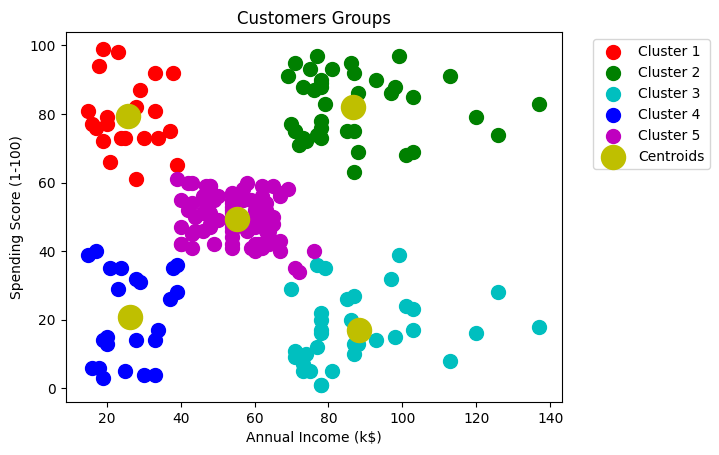

In [87]:
plt.scatter(final[y_pred == 0,0],final[y_pred == 0,1] ,label='Cluster 1',c='r',s=100)
plt.scatter(final[y_pred == 1,0],final[y_pred == 1,1] ,label='Cluster 2',c='g',s=100)
plt.scatter(final[y_pred == 2,0],final[y_pred == 2,1] ,label='Cluster 3',c='c',s=100)
plt.scatter(final[y_pred == 3,0],final[y_pred == 3,1] ,label='Cluster 4',c='b',s=100)
plt.scatter(final[y_pred == 4,0],final[y_pred == 4,1] ,label='Cluster 5',c='m',s=100)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],label='Centroids',c="y",s=300)

plt.legend(bbox_to_anchor=(1.05, 1))
plt.title("Customers Groups")
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
 4   Cluster                 200 non-null    int32 
dtypes: int32(1), int64(3), object(1)
memory usage: 7.2+ KB


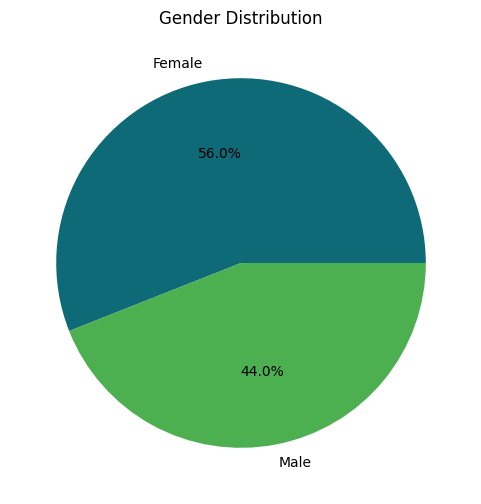

In [91]:
gender_counts=data['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['#0E6A77','#4CAF50'])
plt.title('Gender Distribution')
plt.show()

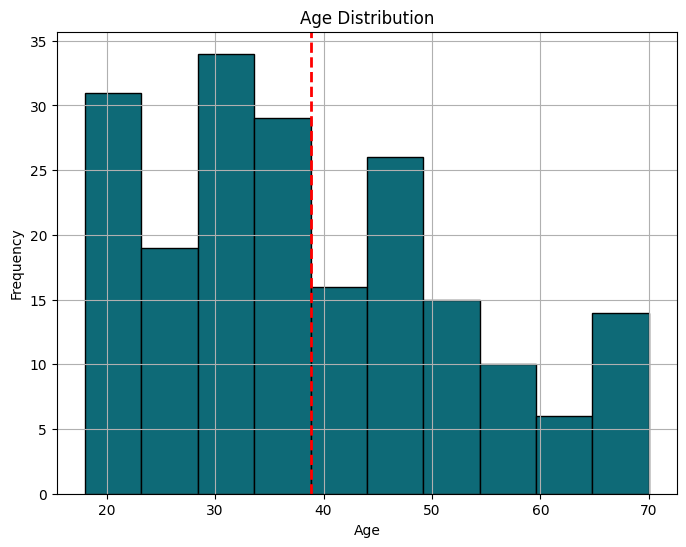

In [93]:
plt.figure(figsize=(8,6))
plt.hist(data['Age'], bins=10, color='#0E6A77', edgecolor='black')
plt.axvline(data['Age'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [95]:
import seaborn as sns

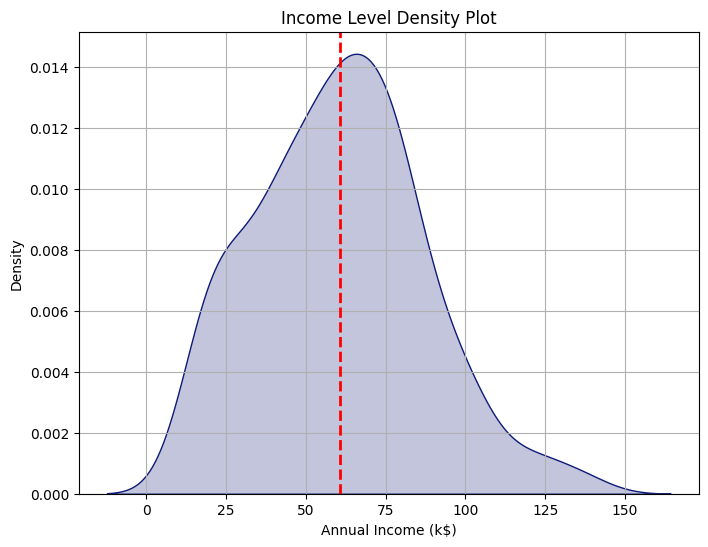

In [97]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data['Annual Income (k$)'], shade=True, color='#0E1A77')
warnings.simplefilter(action='ignore',category=FutureWarning)
plt.axvline(data['Annual Income (k$)'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.title('Income Level Density Plot')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Density')
plt.grid(True)
plt.show()

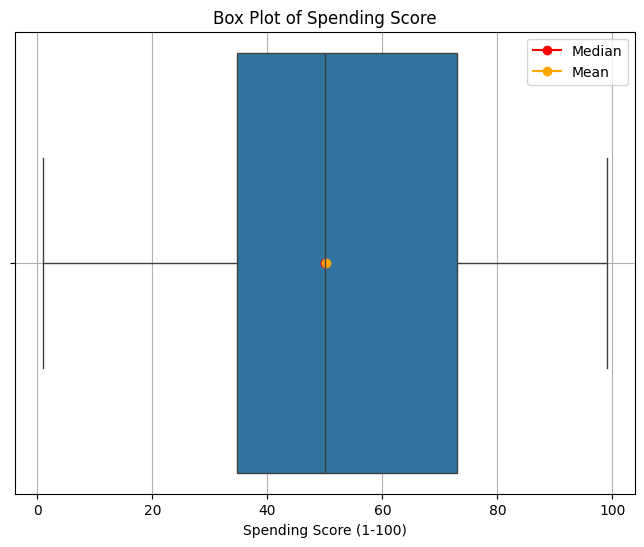

In [99]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Spending Score (1-100)'])
plt.title('Box Plot of Spending Score')
plt.xlabel('Spending Score (1-100)')
median=data['Spending Score (1-100)'].median()
mean=data['Spending Score (1-100)'].mean()
plt.plot(median,0,marker='o',color='red',label='Median')
plt.plot(mean,0,marker='o',color='orange',label='Mean')
plt.legend()
plt.grid(True)
plt.show()

In [101]:
from sklearn.metrics import silhouette_score

In [106]:
print(data.columns)

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Cluster'],
      dtype='object')
